In [ ]:
# straight line seperating the classes in the data
# seperate categories are segergated along the differnt axes
#LDA - can be used for dimensionality reduction & classification

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
iris = load_iris()
x = pd.DataFrame(data = iris.data, columns= iris.feature_names)

In [ ]:
target_names = iris.target_names

In [ ]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = iris.target

In [ ]:
# plot and see if u can find patterns

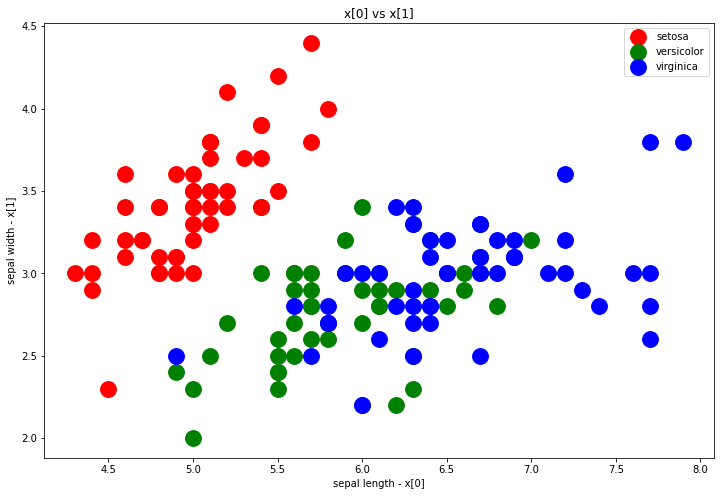

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

X = np.array(x) # note X

for c, i, target_name in zip("rgb", [0, 1, 2], target_names): # itereare 3
  plt.scatter(X[y == i,0], X[y == i, 1], c = c ,s = 250, label= target_name) # sepal length and width # note "X" not "x"
                       #             #
# try with 1,2 then 3,4 etc

plt.title('x[0] vs x[1]')
plt.xlabel("sepal length - x[0]")
plt.ylabel('sepal width - x[1]')
plt.legend()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2) # number of reduced dimensions

In [ ]:
x_new = lda.fit_transform(x, y)

In [ ]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [ ]:
# 99% variance has been preserved

In [ ]:
x_new = pd.DataFrame(x_new)
x_new.head()

,0,1
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463


# **plotting in the new transform axis created by lda**

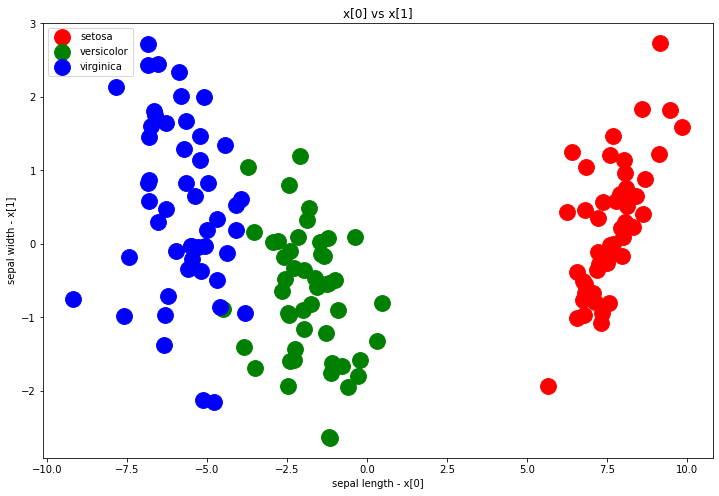

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

X_new = np.array(x_new) # note X

for c, i, target_name in zip("rgb", [0, 1, 2], target_names): # itereate 3
  plt.scatter(X_new[y == i,0], X_new[y == i, 1], c = c ,s = 250, label= target_name) # sepal length and width # note "X" not "x"
                       #             #
# try with 1,2 then 3,4 etc

plt.title('x[0] vs x[1]')
plt.xlabel("sepal length - x[0]")
plt.ylabel('sepal width - x[1]')
plt.legend()
plt.show()

In [ ]:
# observe that there exist a linear boundary
# classes are neately seperateble
lda_corr = x_new.corr()
lda_corr
# very very less corr

,0,1
0,1.000000e+00,-1.366017e-15
1,-1.366017e-15,1.000000e+00


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', multi_class = 'auto')# multiclass will pick right kind of classification to fit (bin or multi)
model.fit(x,y)
model.score(x,y)

0.96

**now train with output of lda, with only 2 features**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', multi_class = 'auto')# multiclass will pick right kind of classification to fit (bin or multi)
model.fit(x_new,y)
model.score(x_new,y)


0.9333333333333333

# **Thus our model did well even with only 2 features**